In [13]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lab 5
The data for the remainder of the course is simulated data of proton-proton collisions at the LHC. The data represents not raw data from detectors, but jets with corresponding kenematic and substructure variables. The data is further broken into two different sets: a signal set labeled "higgs"  and a training set labeled "qcd". Each set contains 100,000 jets all with pt within 250 and 500 GeV.

## Introduction to Jets
A jet is a narrow cone of hadrons and other particles produced by the hadronization of a quark or a gluon. When an object containing color charges fragments, the fragments create color charges around them that all move in the same direction. The collisions at particle accelerators are likely to contain many of these jets which are uninteresiting as a result of the many many collissions that happen every second, however, somewhat infrequently the interactions of the constituent color charges of the proton-proton collision produces physics which we are interested in. These interesting events also result in jets, therefore it is paramount to be able to distinguish the interesting jets from the background jets in order to study particle physics.


## The Data

In [3]:
open_qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
qcd_data = pickle.load(open_qcd)
open_qcd.close()

open_higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
higgs_data = pickle.load(open_higgs)
open_higgs.close()

print(higgs_data.columns, qcd_data.columns)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object') Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


As described above the data is broken into two categories: kinematic variable and jet substructure variables. The kinematic variables are those that describe the overall characteristics of the jet: pT, mass, eta and phi. The substructure variables decribe characteristics of the jets and generated as a function of the kinematic variables or of the kinematic variables that describe the constituent particles of an individual jet. 

#### **Kinematic variables**
The first two variables necessary for decribing a jet give it's location on a sphere surrounding the the collision vertex. The first coordinate variable is $\phi$ and gives the azimuthal angle around the beamline from $-\pi$ to $\pi$. The sencond is $\eta$ which is given by  
$$ \eta = - \ln \cot\frac{\theta}{2}$$

where $\theta$ is the angle off of the beamline. This means that for $\theta = 90$, $\eta = 0$. Large values of $\eta$ correspond to points furhter up or down the beamline. 

In [4]:
data = [higgs_data, qcd_data]
titles = ['Higgs Data','QCD Data']

def makeHists(name, bins):
    """
    Create a histogram and a semiLog histogram for some imput data that looks like
    the plots above
    
    bins: the number of bins
    
    Name: a string, the name of the column to be histogrammed
    """
    fig, ax = plt.subplots(1,2, figsize = (20,10))
    
    for i in range(2):
        ax[i].hist(data[i][name], bins)
        ax[i].set_title(titles[i], fontsize = 24)
        ax[i].set_xlabel(f'{name}', fontsize = 24)
        ax[i].set_ylabel('counts', fontsize = 24)
        ax[i].set_yscale('log')

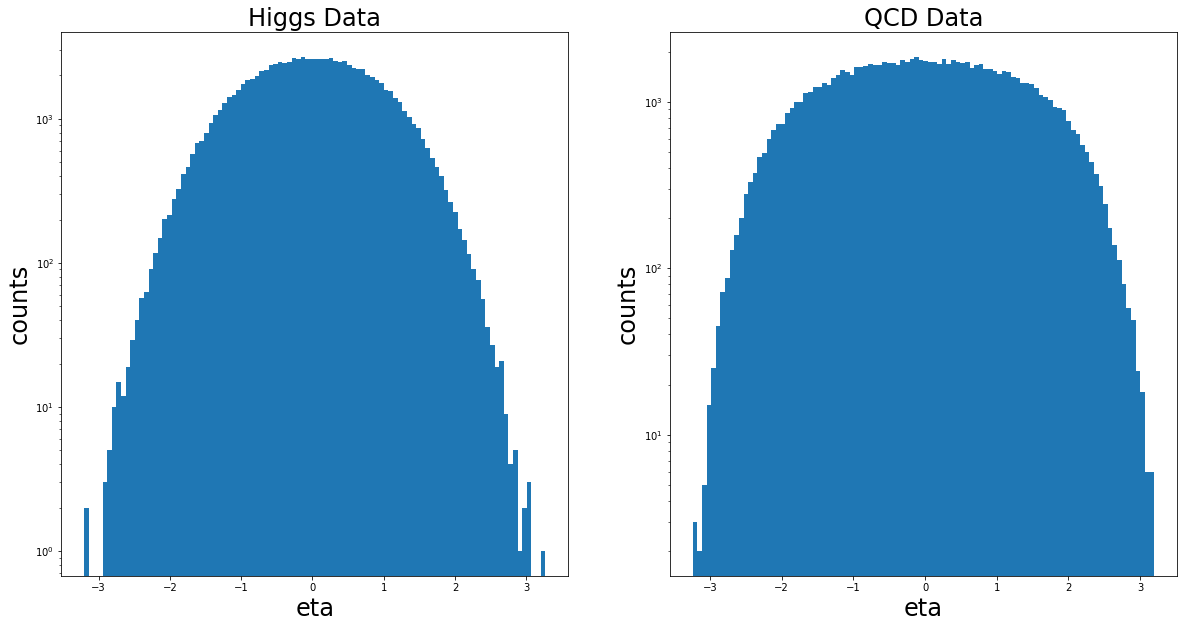

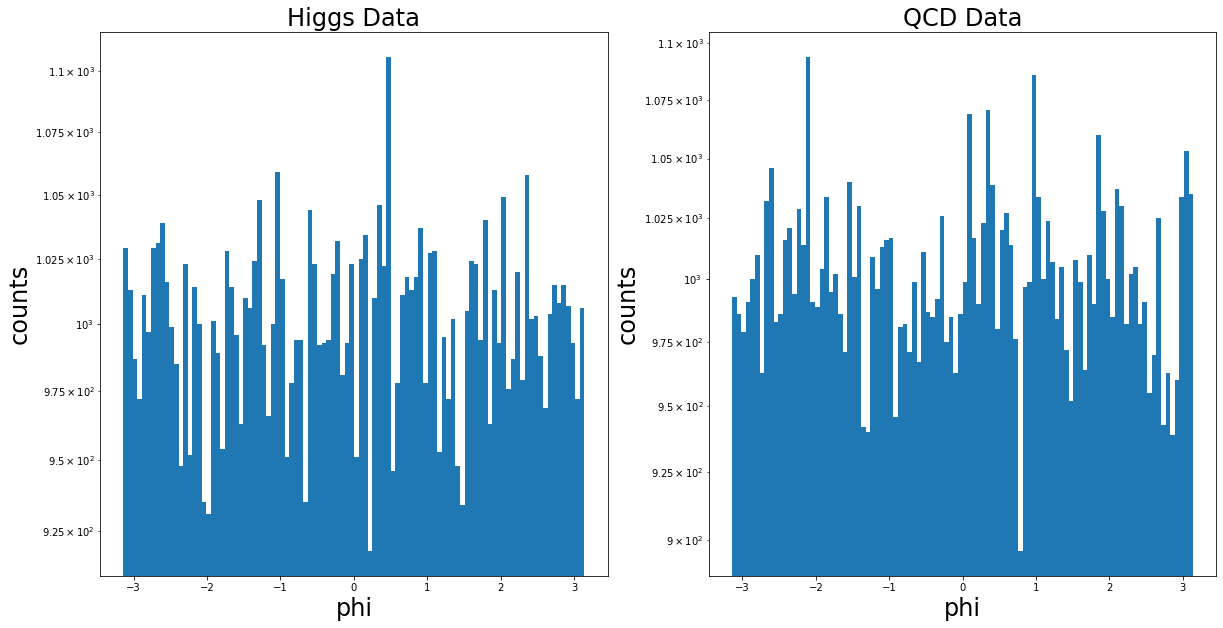

In [5]:

makeHists('eta', 100)
makeHists('phi', 100)

 **Mass and transverse momentum**

Mass and transverse momentum are measured for each jet using the path an indivudual particle takes through the detector and the energy it deposits onto various calorimeters. For a jet, the mass and transverse momentum are the sum of the constituent particles. This quantity is used as the same variables for the hadrons that created the jet initially. For the data set we are working on, pT is constrained between 250 and 500 GeV.

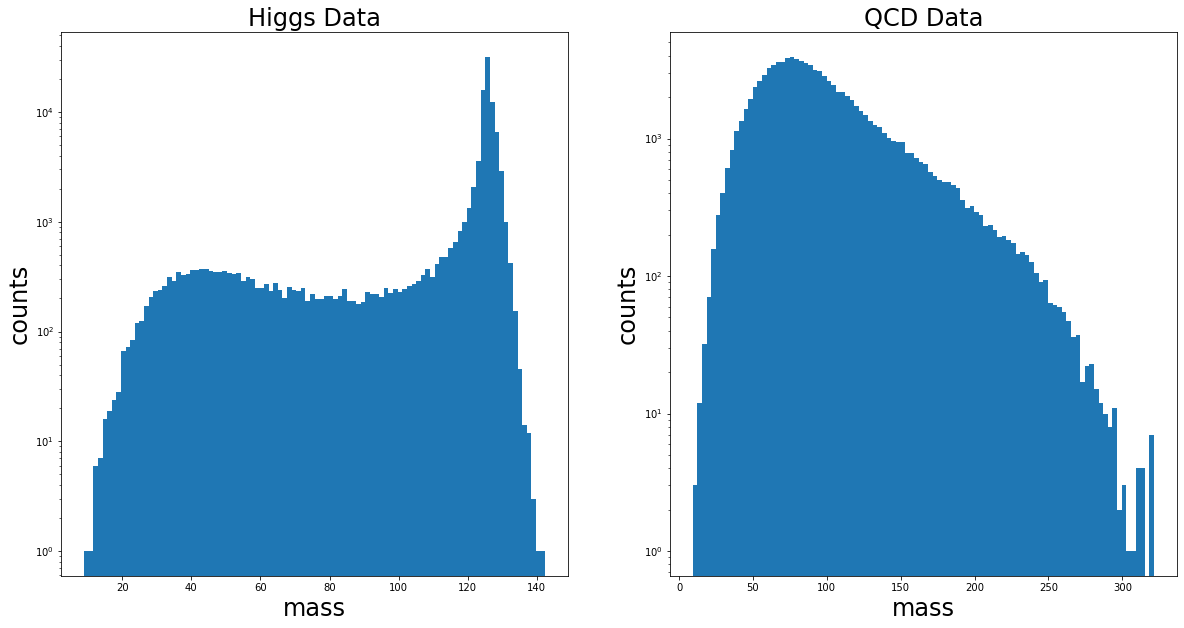

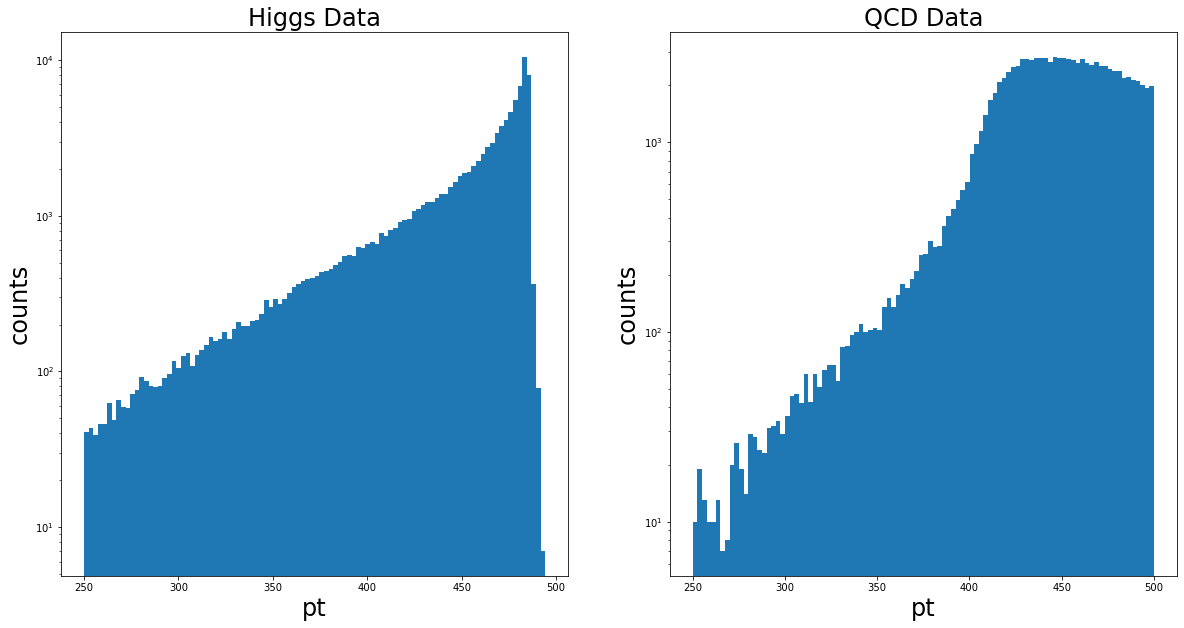

In [6]:
makeHists('mass', 100)
makeHists('pt', 100)

#### **Substructure variables:**

As stated above the substructure variables are characteristics of individual jets. They can further be categorized into variables that describe the shape of the jet: energy correlation ratios and angularity and subjettiness: n-subjettiness and $k_t\Delta R$. 

**Jet shape variables**
The energy correlation ratios $E_{CFN}(\beta)$ where $N$ is some integer are given by
$$ E_{CFN}(\beta) = \sum_{i < j \in J}p_{Ti}p_{Tj}(\Delta R_{ij})^{\beta}
$$

for a jet J with constituents i. The 2 point correlation function is for when there are 2 constituent subjets of some jet J. $\beta$ is to give weight to the angular separation of ht ejete constituents. In the simulated data these functions are provided as  
$$ 
e_2 = \frac{E_{CF2}}{E_{CF1}}  
$$
and
$$e_3 = \frac{E_{CF3}}{E_{CF1}}$$

which correspond to `ee2` and `ee3`. Finally the quantity $D_2$ which is given by 
$$ D_2 = \frac{e_3}{(e_2)^3}
$$
is particularly useful in identifying two-body structure within jets and is represented in the dataset by `d2`. 

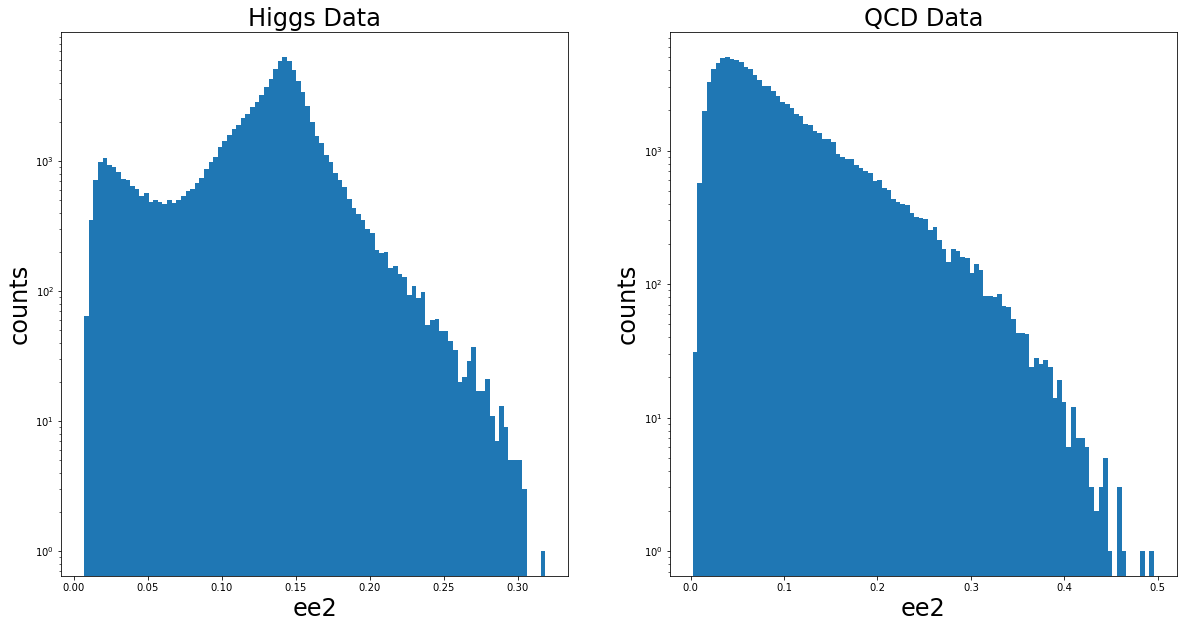

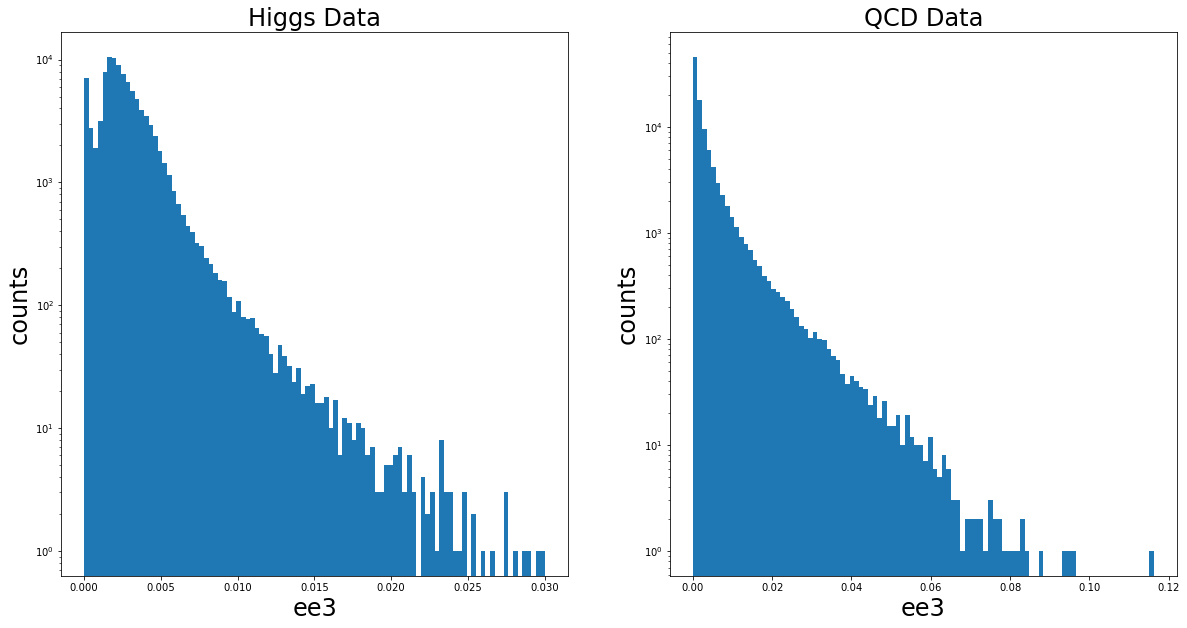

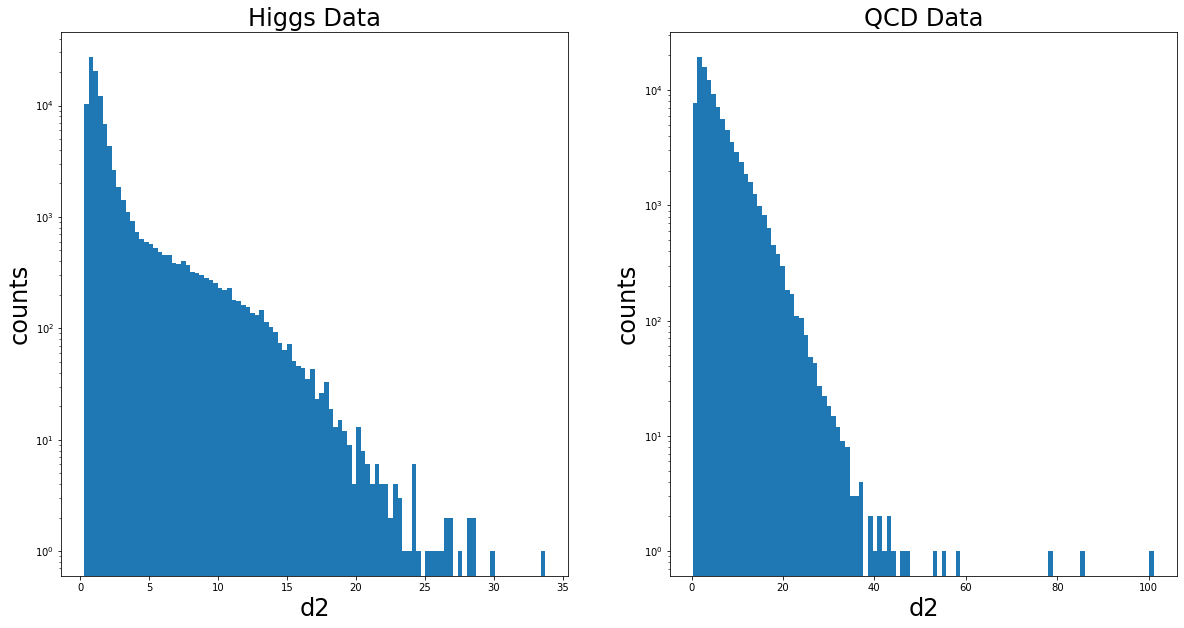

In [7]:
makeHists('ee2', 100)
makeHists('ee3', 100)
makeHists('d2', 100)

**Angularity, Subjettiness and $k_t\Delta R$**

The final seven variables all have to do with the something called *subjettiness*. Subjettiness refers the amount that an individual jet can be classified as constituent jets. Subjettiness is defined as
$$
\tau_N = \frac{1}{\tau_0}\sum_i\in J p_{Ti} \min(\Delta R_1 ... R_N)
$$

where N can take on value and the quantity $R_N$ is the distance between the $i^{th}$ constituent and the subaxes N of the jet. The ratios $\tau_{21} = \frac{\tau_2}{\tau_1}$ and $\tau_{32} = \frac{\tau_3}{\tau_2}$ have been shown to be particularly useful in identifying two-body structures in jets

[source](https://arxiv.org/pdf/1510.05821.pdf)

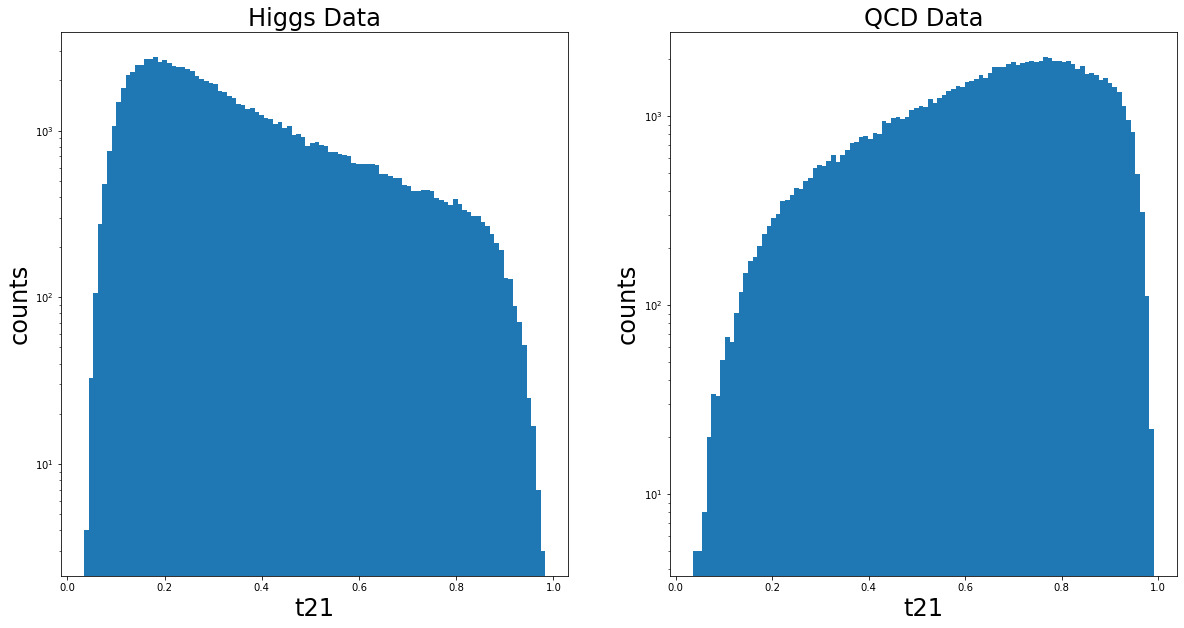

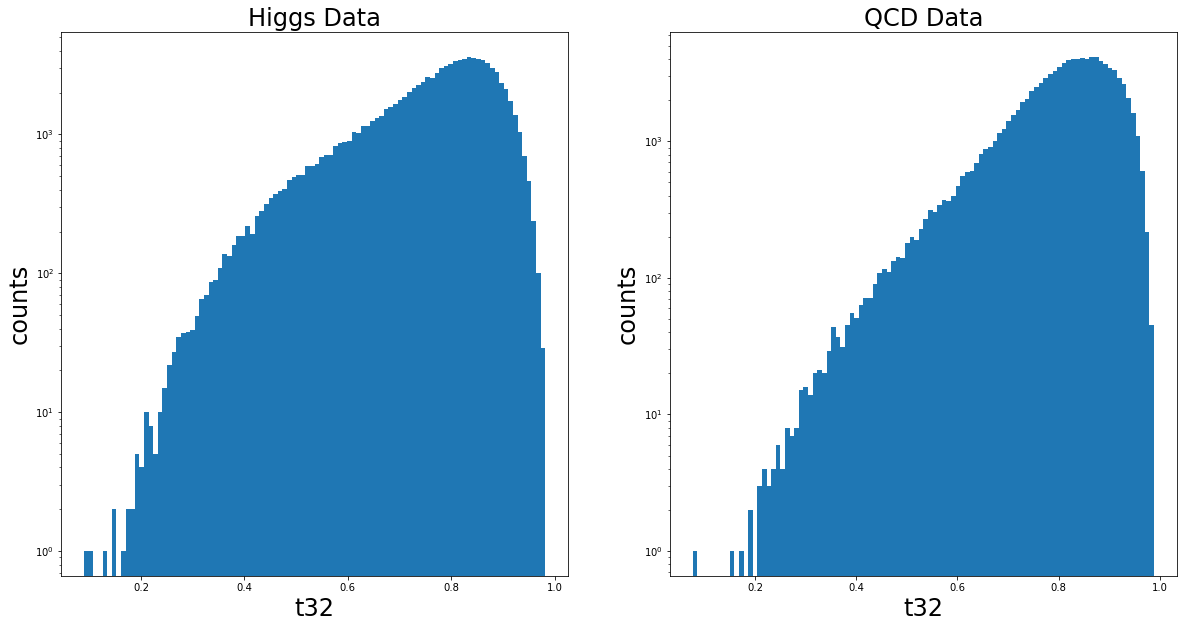

In [8]:
makeHists('t21', 100)
makeHists('t32', 100)

Angularity is measure of the distribution of energy flow inside of a jet. It is therfore a useful characteristic in determining the presence of subjets within a jet constrained by radius R. It measures the amount of energy distributed away from the central axis of the jet.

$$
\tau  = \frac{1}{M}\sum_i E_i \sin \theta_i (1-\cos \theta_i)
$$

where M is the jet mass and E_i is the energy of the ith constituent and $\theta_i $ is the angle between the central jet axis and the ith constituets trajectory

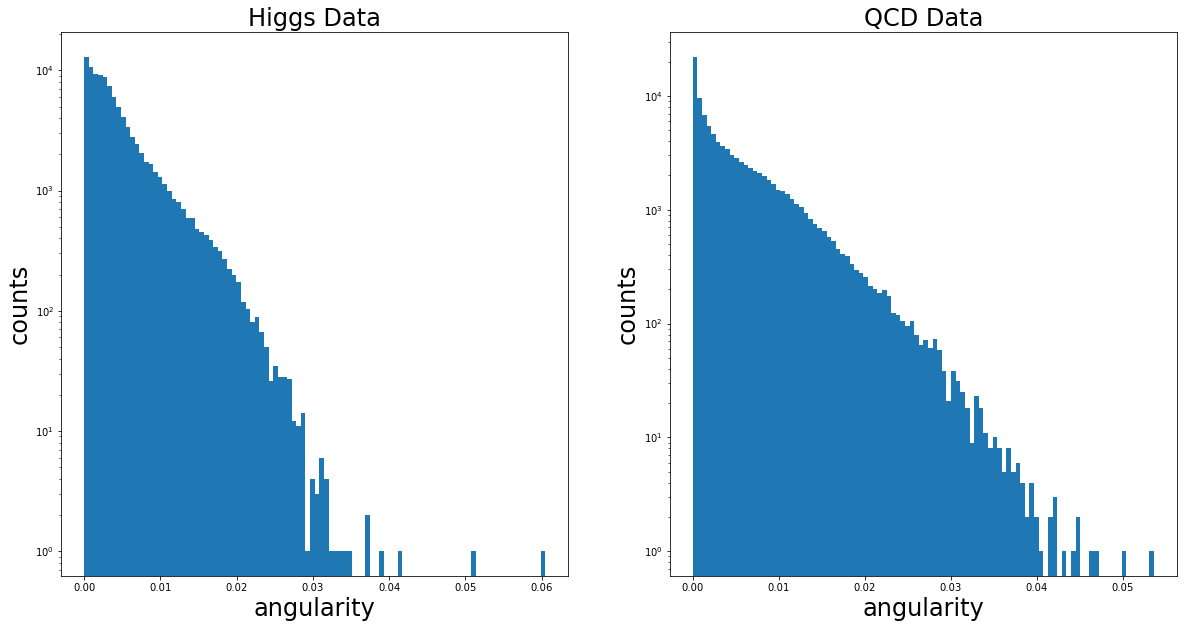

In [73]:
makeHists('angularity', 100)

Finally $k_t\Delta R$ Is a measure of the distance between two subjets within the large-R jet. The quantity R defines the solid angle in $\eta$, $\phi$ space that an individual jet takes up. 

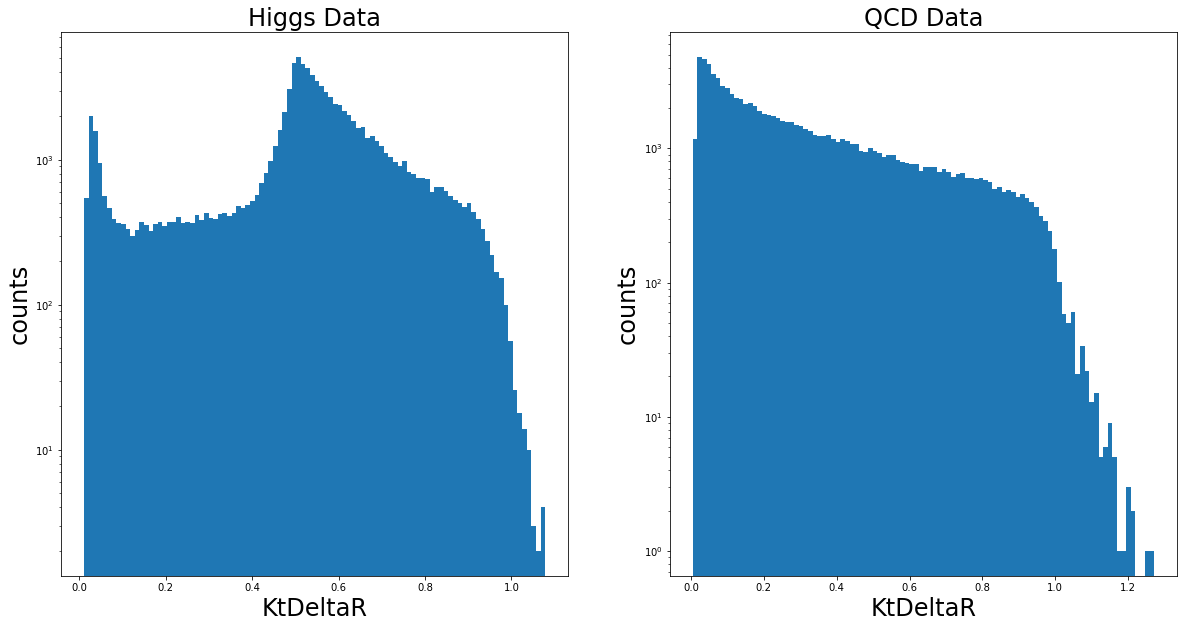

In [75]:
makeHists('KtDeltaR', 100)

#### Correlations
In general the data is correlated since many of the substructure variables are functions of the kinematic variables for individual jet constituents. This means that correlations can be found between many of the substructure variables and the kinematic variables. Evidence of this can be seen in the first four histograms below where there is a strong correlation between the plotted variables. It should be noted that there is especially low correlation between phi and every other varible owing to the fact that phi is uniformly distributed for both the QCD and Higgs datasets.

In [9]:
def make2dHists(name1, name2, bins):
    """
    Create a histogram and a semiLog histogram for some imput data that looks like
    the plots above
    
    bins: [array] the number of bins in each axis
    
    Name: a string, the name of the column to be histogrammed
    """
    fig, ax = plt.subplots(1,2, figsize = (20,10))
    
    for i in range(2):
        ax[i].hist2d(data[i][name1], data[i][name2], bins)
        ax[i].set_title(titles[i], fontsize = 24)
        ax[i].set_xlabel(f'{name1}', fontsize = 24)
        ax[i].set_ylabel(f'{name2}', fontsize = 24)

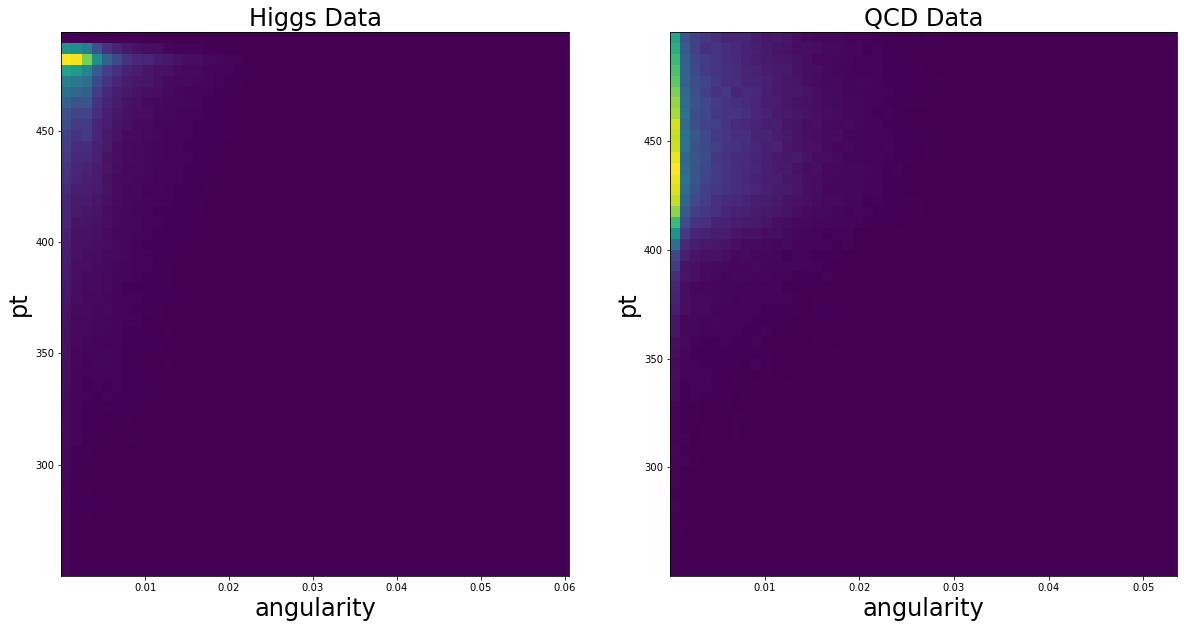

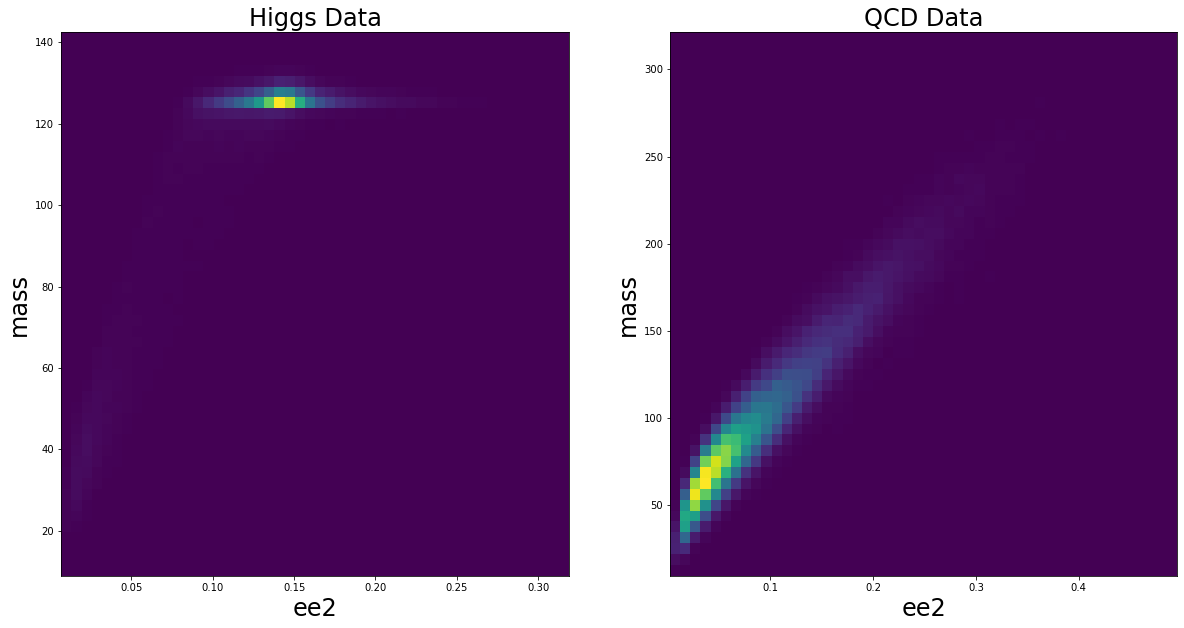

In [10]:
make2dHists('angularity', 'pt', [50,50])
make2dHists('ee2', 'mass', [50,50])

#### Discovery sensitivity
The expected discoovery sensitivity is the number of higgs required in order to claim a discovery assuming that the background isn't producing a signal. With this knowledge the discovery sensitivity corresponds to the number of higgs that fall at the 5 sigma threshold for a poisson distribution where the mean is given by the number of expected higgs events for a given dataset. The expected discovery sensitivity for the QCD and Higgs datasets is given below.

In [22]:
prob = stats.norm.sf(5, loc = 0, scale = 1)

countsHiggs = stats.poisson.isf(prob, mu = 100)
print(f'The expected discovery sensitivity for the Higgs dataset corresponds to a measuremnt of {countsHiggs}',
     'higgs events')
countsQCD = stats.poisson.isf(prob, mu = 20000)
print('The expected discovery sensitivity for the QCD dataset', 
      f'corresponds to a measurement of {countsQCD} higgs events')

The expected discovery sensitivity for the Higgs dataset corresponds to a measuremnt of 154.0 higgs events
The expected discovery sensitivity for the QCD dataset corresponds to a measurement of 20711.0 higgs events


#### Discrimination power and Optimization plan
All of the variables look like they provide some discrimination power based on the histograms plotted above. That said it is obvious that a few of them are much better suited to discerning between the signal and the background than the the others. Particularly, `KtDeltaR`, `t21`, mass and the energy correlation functions all differ significantly from the same distribution for the background. This suggests that these variables in particular would provide a successful method for eliminating the background from the sample. The variables `angularity`, `phi` and `eta` do not look like they provide hardly any discrimination power at all on the grounds that the distributions for these variables between the Higgs and QCD datasets looks almost the same. 

In order to optimize the discovery sensitivity, the background of the data must be reduced. There are multiple variables along which the data can be sliced that look like they would allow for some of the background to be removed without removing any of the signal i.e. the Higgs events. So, in order to optimize the discovery sensitivity, the events will be included or excluded into a final sample where that data has been chosed to include as many Higgs events as possible.